In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
Data=pd.read_csv("E:\Churn_Modelling.csv")

In [66]:
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
Data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [68]:
Data.drop("RowNumber",axis=1,inplace=True)

In [69]:
Data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
Data['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [71]:
Data.drop(['CustomerId','Surname'],axis=1,inplace=True)

Text(0.5, 1.0, 'salary')

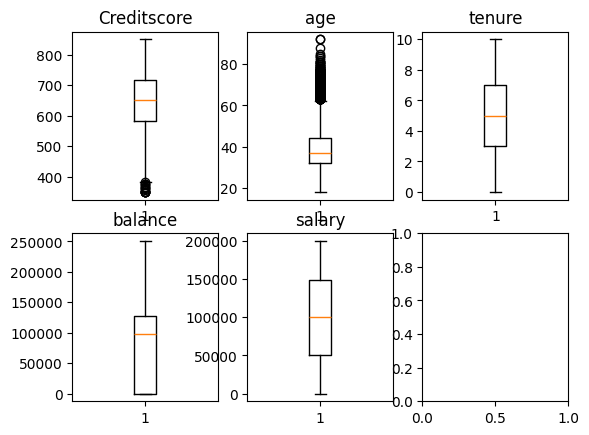

In [72]:
fig, axs = plt.subplots(2, 3)

axs[0, 0].boxplot(Data['CreditScore'])
axs[0, 0].set_title('Creditscore')

axs[0, 1].boxplot(Data['Age'])
axs[0, 1].set_title('age')

axs[0, 2].boxplot(Data['Tenure'])
axs[0, 2].set_title('tenure')

axs[1, 0].boxplot(Data['Balance'])
axs[1, 0].set_title("balance")

axs[1, 1].boxplot(Data['EstimatedSalary'])
axs[1, 1].set_title('salary')


In [73]:
Data.duplicated().sum()

0

In [74]:
Data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [75]:
percentile25_Credit = Data['CreditScore'].quantile(0.25)
percentile75_Credit = Data['CreditScore'].quantile(0.75)

In [76]:
iqr_Credit = percentile75_Credit - percentile25_Credit

In [77]:
upper_limit_Credit = percentile75_Credit + 1.5 * iqr_Credit
lower_limit_Credit = percentile25_Credit - 1.5 * iqr_Credit

In [78]:

Data['CreditScore'] = np.where(
    Data['CreditScore'] > upper_limit_Credit,
    upper_limit_Credit,
    np.where(
        Data['CreditScore'] < lower_limit_Credit,
        lower_limit_Credit,
        Data['CreditScore']
    )
)

In [79]:
percentile25_Age = Data['Age'].quantile(0.25)
percentile75_Age = Data['Age'].quantile(0.75)

In [80]:
iqr_Age = percentile75_Age - percentile25_Age

In [81]:
upper_limit_Age = percentile75_Age + 1.5 * iqr_Age
lower_limit_Age = percentile25_Age - 1.5 * iqr_Age

In [82]:

Data['Age'] = np.where(
    Data['Age'] > upper_limit_Age,
    upper_limit_Age,
    np.where(
        Data['Age'] < lower_limit_Age,
        lower_limit_Age,
        Data['Age']
    )
)

<Axes: ylabel='CreditScore'>

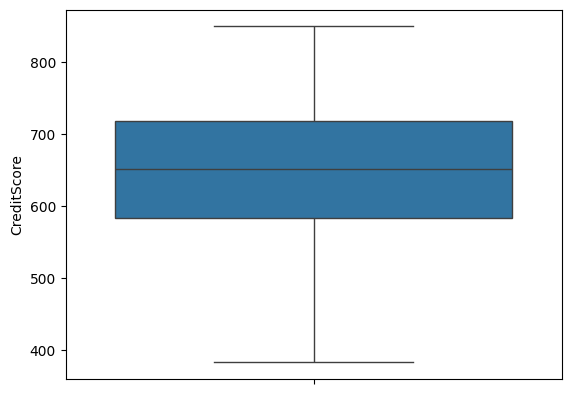

In [83]:
sns.boxplot(Data['CreditScore'])

<Axes: ylabel='Age'>

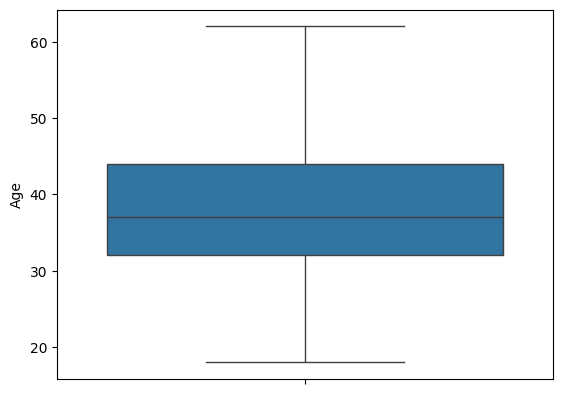

In [84]:
sns.boxplot(Data['Age'])


<Axes: ylabel='CreditScore'>

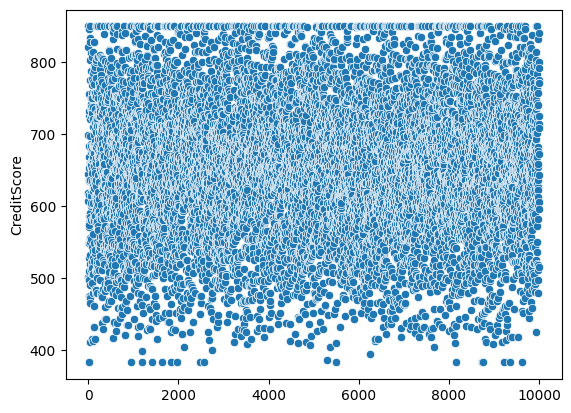

In [85]:
sns.scatterplot(Data['CreditScore'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9980\906535623.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=Data['CreditScore'], bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)


<Axes: xlabel='CreditScore', ylabel='Density'>

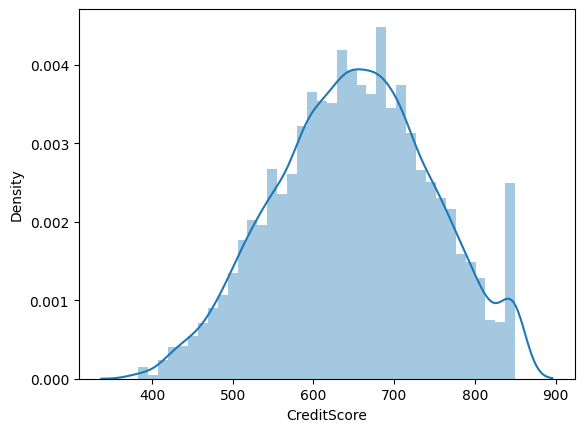

In [86]:
sns.distplot(a=Data['CreditScore'], bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)

<Axes: xlabel='Geography', ylabel='count'>

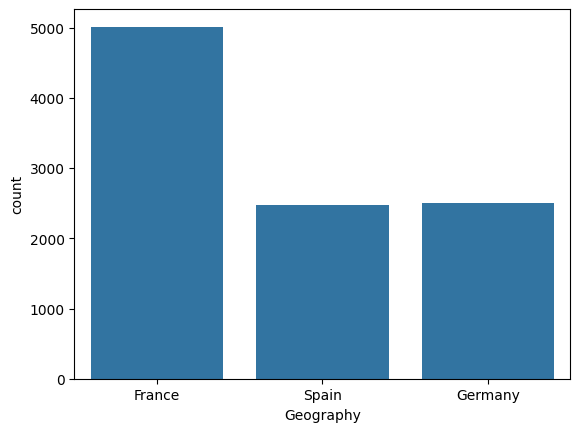

In [87]:
sns.countplot(Data, x="Geography")

<Axes: xlabel='Gender', ylabel='count'>

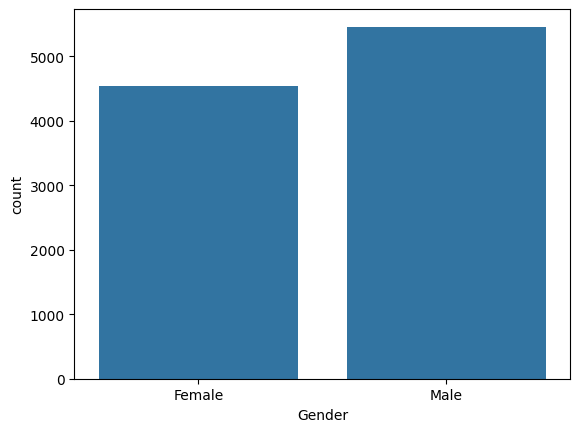

In [88]:
sns.countplot(Data, x="Gender")

<Axes: xlabel='HasCrCard', ylabel='count'>

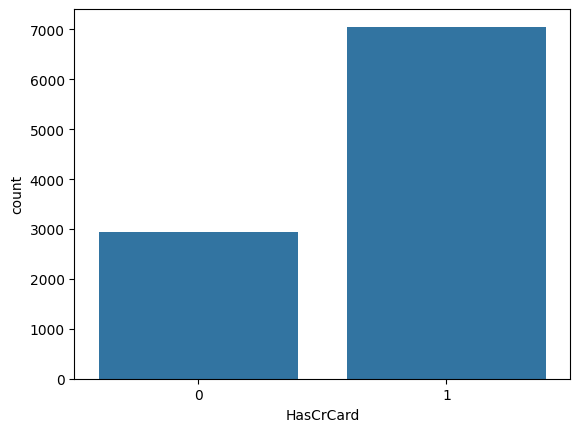

In [89]:
sns.countplot(Data, x="HasCrCard")

<Axes: xlabel='IsActiveMember', ylabel='count'>

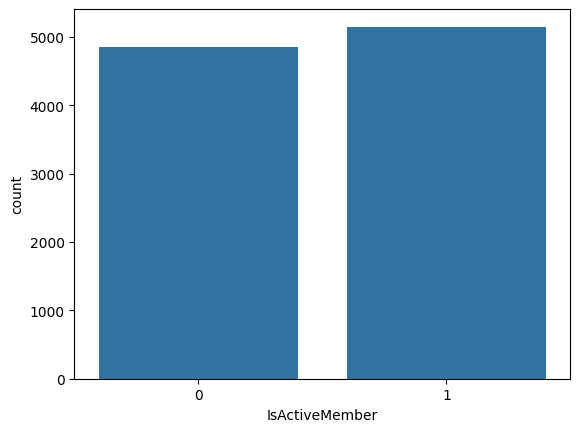

In [90]:
sns.countplot(Data, x="IsActiveMember")

<Axes: xlabel='NumOfProducts', ylabel='count'>

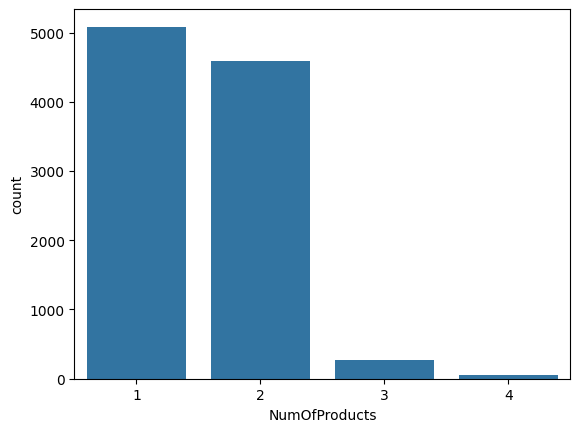

In [91]:
sns.countplot(Data, x="NumOfProducts")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9980\3755373269.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=Data['Age'], bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)


<Axes: xlabel='Age', ylabel='Density'>

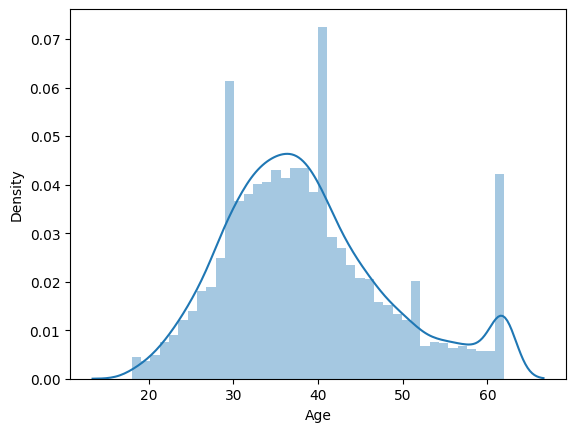

In [92]:
sns.distplot(a=Data['Age'], bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)

In [93]:
def remove(int):
    if(int==3):
        return 2
    elif(int==4):
        return 1
    else:
        return int

In [94]:
Data['NumOfProducts']=Data['NumOfProducts'].apply(remove)

<Axes: xlabel='NumOfProducts', ylabel='count'>

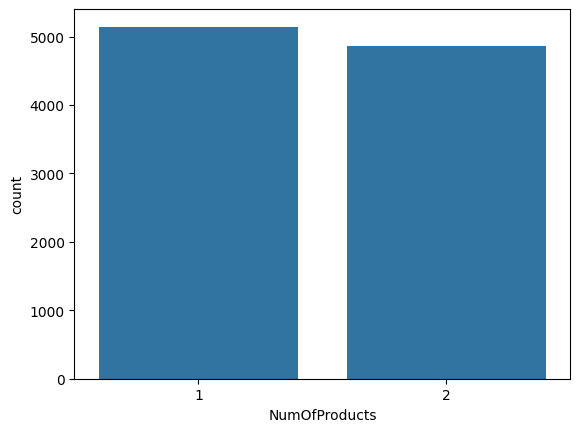

In [95]:
sns.countplot(Data, x="NumOfProducts")

<Axes: xlabel='IsActiveMember', ylabel='count'>

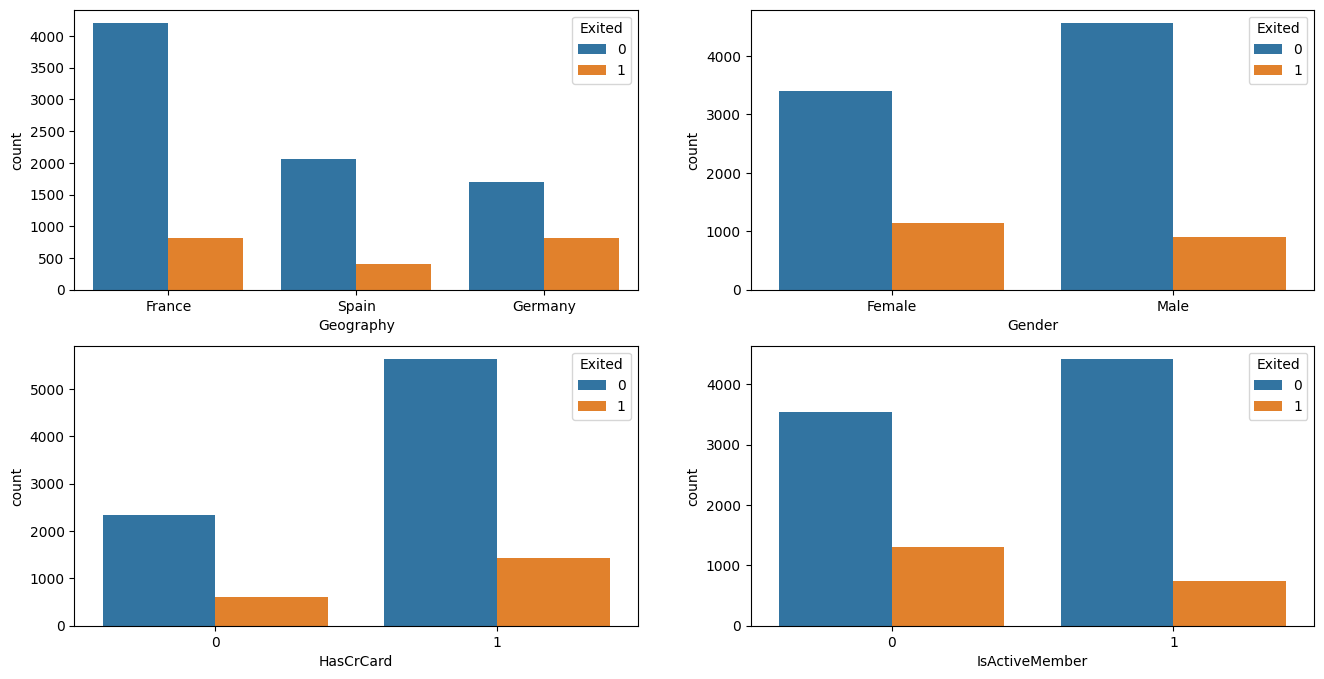

In [96]:
fig, axarr = plt.subplots(2, 2, figsize=(16, 8))
sns.countplot(x='Geography', hue = 'Exited',data = Data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = Data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = Data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = Data, ax=axarr[1][1])

In [97]:
Data.to_csv("./new_data")

In [98]:
Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,2,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [99]:
Data['EstimatedSalary'].mean()

100090.239881

In [100]:
Data['Gender']=Data['Gender'].astype('string')
Data['Geography']=Data['Geography'].astype('string')

In [101]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  string 
 2   Gender           10000 non-null  string 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(4), int64(5), string(2)
memory usage: 859.5 KB


In [102]:
x = Data.drop(columns='Exited')
y = Data['Exited']

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

sc = StandardScaler()

In [105]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first')
transformer=ColumnTransformer([('tnf_1',OneHotEncoder(handle_unknown='ignore'),[1])
                               ,('tnf_2',OneHotEncoder(handle_unknown='ignore'),[2])],remainder='passthrough')

In [107]:
pipe=Pipeline([('transformer',transformer),
               ('scaler',sc),
              ('model',log)])

In [108]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf_1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [1]),
                                                 ('tnf_2',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [2])])),
                ('scaler', StandardScaler()), ('model', LogisticRegression())])

In [109]:
import pickle as pkl
filename='./model.pkl'
pkl.dump(pipe,open(filename,'wb'))


In [110]:
y_pred=pipe.predict(x_test)

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
score=accuracy_score(y_test,y_pred)

In [113]:
print(score)

0.832
